#House Price Prediction

Problem Statement: An US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.





The solution is divided into the following sections:

*  Data understanding 
*  Data cleaning and preparation
*  Data Visualization
*  Model building and evaluation





In [ ]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading and checking the data from train.csv
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data understanding

In [ ]:
housing.shape

(1460, 81)

In [ ]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Summary of the dataset : 1460 rows, 81 columns

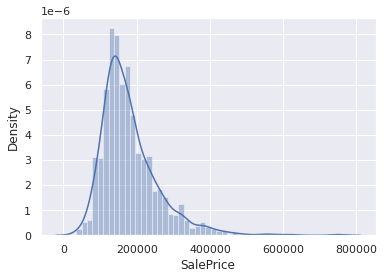

In [ ]:
#Summary of the dataset : 1460 rows, 81 columns
sns.distplot(housing['SalePrice'])

In [ ]:
#checking percentage of missing values in columns, which has null values
total_nullvalues=housing.isnull().sum()
round((100*(total_nullvalues[total_nullvalues > 0])/len(housing.index)), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

# Data Cleaning & Preparation

(a) Missing value treatment

In [ ]:
#We saw from data_description that NA in PoolQC column means 'No Pool', so replacing NA by it.
housing['PoolQC'].fillna('No_Pool', inplace=True) 

In [ ]:
#Alley column--replacing NA with 'No alley access'
housing['Alley'].fillna('No_alley_access', inplace=True) 

In [ ]:
#Replacing median values in LotFrontage, where data is missing
housing['LotFrontage']=housing['LotFrontage'].transform(lambda x :x.fillna(x.median()))

In [ ]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
#Based on the above output,replacing missing value of 'MasVnrType' with 'none'
housing['MasVnrType'].fillna('None', inplace=True)


In [ ]:
#replacing missing value of 'MasVnrArea' with 'median'
housing.MasVnrArea.fillna(housing.MasVnrArea.median(),inplace=True)

In [ ]:
#replacing missing value of 'BsmtQual' with 'none'
housing['BsmtQual'].fillna('No_basement', inplace=True)

In [ ]:
#replacing missing value of 'BsmtCond' with 'none'
housing['BsmtCond'].fillna('No_basement', inplace=True)

In [ ]:
#BsmtQualreplacing missing value of 'BsmtExposure' with 'none'
housing['BsmtExposure'].fillna('No_basement', inplace=True)

In [ ]:
#replacing missing value of 'BsmtFinType1' with 'none'
housing['BsmtFinType1'].fillna('No_basement', inplace=True)

In [ ]:
#replacing missing value of 'BsmtFinType2' with 'none'
housing['BsmtFinType2'].fillna('No_basement', inplace=True)

In [ ]:
#replacing missing value of 'Electrical' with 'mode'
housing.Electrical.fillna(housing.Electrical.mode(),inplace=True)

In [ ]:
#replacing missing value of 'GarageType' with 'none'
housing['GarageType'].fillna('No_Garage', inplace=True)


In [ ]:
#replacing missing value of 'GarageFinish' with 'none'
housing['GarageFinish'].fillna('No_Garage', inplace=True)

In [ ]:
#replacing missing value of 'GarageQual' with 'none'
housing['GarageQual'].fillna('No_Garage', inplace=True) 


In [ ]:
#replacing missing value of 'GarageCond' with 'none'
housing['GarageCond'].fillna('No_Garage', inplace=True) 

#### (b) Feature engineering

In [ ]:
housing['Building_age']=housing.YrSold-housing.YearBuilt

In [ ]:
housing['Garage_age']=housing.YrSold-housing.GarageYrBlt

In [ ]:
housing.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Building_age,Garage_age
58,59,60,RL,66.0,13682,Pave,No_alley_access,IR2,HLS,AllPub,...,NaN,NaN,0,10,2006,New,Partial,438780,0,0.0
864,865,20,FV,72.0,8640,Pave,No_alley_access,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2008,New,Partial,250580,1,0.0
471,472,60,RL,92.0,11952,Pave,No_alley_access,Reg,Lvl,AllPub,...,NaN,NaN,0,11,2007,WD,Normal,190000,30,30.0
525,526,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2006,WD,Normal,176000,1,1.0
840,841,70,RH,69.0,12155,Pave,No_alley_access,IR1,Lvl,AllPub,...,NaN,NaN,0,3,2008,WD,Normal,140000,83,74.0


#### (C) Dropping unnecessary columns

In [ ]:
# Dropping columns which are having high missing value and irrelevant columns for this model
housing=housing.drop(['FireplaceQu','Fence', 'MiscFeature','Id','MoSold','Street','Utilities','Condition2'], axis=1)

In [ ]:
round(housing.isnull().sum()/len(housing.index),2).sort_values(ascending=False).head()

Garage_age     0.06
GarageYrBlt    0.06
GarageCars     0.00
GarageType     0.00
Fireplaces     0.00
dtype: float64

In [ ]:
#Replacing Null value of Garage_age with 99,because if I impute '0' then it may misslead as a new garage
housing['Garage_age'].fillna(99, inplace=True) 

In [ ]:
housing['Garage_age'] = housing['Garage_age'].astype('int64')

In [ ]:
#Dropping GarageYrBlt,YrSold,YearBuilt as we have derived few columns out of these and now these are not required
housing=housing.drop(['GarageYrBlt','YrSold','YearBuilt'],axis=1)

In [ ]:
round(housing.isnull().sum()/len(housing.index),2).sort_values(ascending=False).head()

MSSubClass    0.0
MSZoning      0.0
GarageType    0.0
Fireplaces    0.0
Functional    0.0
dtype: float64

No Null/missing values now in fields.

In [ ]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SaleType,SaleCondition,SalePrice,Building_age,Garage_age
0,60,RL,65.0,8450,No_alley_access,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,No_Pool,0,WD,Normal,208500,5,5
1,20,RL,80.0,9600,No_alley_access,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,No_Pool,0,WD,Normal,181500,31,31
2,60,RL,68.0,11250,No_alley_access,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,No_Pool,0,WD,Normal,223500,7,7
3,70,RL,60.0,9550,No_alley_access,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,No_Pool,0,WD,Abnorml,140000,91,8
4,60,RL,84.0,14260,No_alley_access,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,No_Pool,0,WD,Normal,250000,8,8


### (d) Encoding

In [ ]:
#As per the data description few fields are not actually numeric.These are indicating some catagories.
#So replacing with respective values.
#Variable names:MSSubClass,OverallQual,OverallCond

housing['MSSubClass'].replace({20:"1-STORY 1946 & NEWER",
                               30:"1-STORY 1945 & OLDER",
                               40:"1-STORY W/FINISHED",
                               45:"1-1/2 STORY - UNFINISHED",
                               50:"1-1/2 STORY FINISHED",
                               60:"2-STORY 1946 & NEWER",
                               70:"2-STORY 1945 & OLDER",
                               75:"2-1/2 STORY ALL AGES",
                               80:"SPLIT OR MULTI-LEVEL",
                               85:"SPLIT FOYER",
                               90:"DUPLEX",
                               120:"1-STORY PUD",
                               150:"1-1/2 STORY PUD",
                               160:"2-STORY PUD",
                               180:"PUD - MULTILEVEL",
                               190:"2 FAMILY CONVERSION"                         
                              },inplace=True)
housing['OverallQual'].replace({10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",
                                 6:"Above Average",5:"Average",4:"Below Average",3:"Fair",2:"Poor",1:"Very Poor"                            
                              },inplace=True)
housing['OverallCond'].replace({10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",
                                 6:"Above Average",5:"Average",4:"Below Average",3:"Fair",2:"Poor",1:"Very Poor"                            
                              },inplace=True)

In [ ]:
#Encoding of some ordered catagorical variables:ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,PoolQC
ExterQual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1}
housing['ExterQual'] = housing['ExterQual'].map(ExterQual_map)

ExterCond_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1}
housing['ExterCond'] = housing['ExterCond'].map(ExterCond_map)


BsmtQual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No_basement':0}
housing['BsmtQual'] = housing['BsmtQual'].map(BsmtQual_map)


BsmtCond_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No_basement':0}
housing['BsmtCond'] = housing['BsmtCond'].map(BsmtCond_map)


HeatingQC_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1}
housing['HeatingQC'] = housing['HeatingQC'].map(HeatingQC_map)

CentralAir_map = {'Y':1,'N':0}
housing['CentralAir'] = housing['CentralAir'].map(CentralAir_map)

KitchenQual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1}
housing['KitchenQual'] = housing['KitchenQual'].map(KitchenQual_map)

GarageFinish_map = {'Fin':3,'RFn':2,'Unf':1,'No_Garage':0}
housing['GarageFinish'] = housing['GarageFinish'].map(GarageFinish_map)

GarageQual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No_Garage':0}
housing['GarageQual'] = housing['GarageQual'].map(GarageQual_map)

GarageCond_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No_Garage':0}
housing['GarageCond'] = housing['GarageCond'].map(GarageCond_map)

PoolQC_map = {'Ex':4, 'Gd':3, 'TA':2,'Fa':1,'No_Pool':0}
housing['PoolQC'] = housing['PoolQC'].map(PoolQC_map)

In [ ]:
housing.shape

(1460, 72)

###### Checking the value counts of few catagorical variables where number of catagories are more

creating new catagory 'others' and putting catagories which has low count into it.

In [ ]:
#Neighborhood
housing.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [ ]:
need_field=housing['Neighborhood'].value_counts().index[:9]
housing['Neighborhood'] = np.where(housing['Neighborhood'].isin(need_field), housing['Neighborhood'], 'Nei_others')

In [ ]:
housing['Neighborhood'].value_counts()

Nei_others    483
NAmes         225
CollgCr       150
OldTown       113
Edwards       100
Somerst        86
Gilbert        79
NridgHt        77
Sawyer         74
NWAmes         73
Name: Neighborhood, dtype: int64

In [ ]:
#Exterior1st
housing.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [ ]:
need_field=housing['Exterior1st'].value_counts().index[:7]
housing['Exterior1st'] = np.where(housing['Exterior1st'].isin(need_field), housing['Exterior1st'], 'Exter_others')

housing.Exterior1st.value_counts()

VinylSd         515
HdBoard         222
MetalSd         220
Wd Sdng         206
Plywood         108
Exter_others     78
CemntBd          61
BrkFace          50
Name: Exterior1st, dtype: int64

In [ ]:
#Exterior2nd
housing.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [ ]:
need_field=housing['Exterior2nd'].value_counts().index[:6]
housing['Exterior2nd'] = np.where(housing['Exterior2nd'].isin(need_field), housing['Exterior2nd'], 'Exter2_others')
housing.Exterior2nd.value_counts()

VinylSd          504
MetalSd          214
HdBoard          207
Wd Sdng          197
Plywood          142
Exter2_others    136
CmentBd           60
Name: Exterior2nd, dtype: int64

#### (e) Outlier treatment

In [ ]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
ExterQual,1460.0,3.395890,0.574280,2.0,3.00,3.0,4.00,5.0
ExterCond,1460.0,3.083562,0.351054,1.0,3.00,3.0,3.00,5.0
BsmtQual,1460.0,3.489041,0.876478,0.0,3.00,4.0,4.00,5.0
BsmtCond,1460.0,2.934932,0.552159,0.0,3.00,3.0,3.00,4.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


We observed that Outliers are present in data.

In [ ]:
#Removing outliers from numeric columns
#here I am taking 25% and 99%
numcol = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice','Building_age','Garage_age']
def dropOutliers(x):
    #list1 = []
    for col in numcol:
        Q1 = x[col].quantile(.05)
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing = dropOutliers(housing)

In [ ]:
housing.shape

(1349, 72)

## Visualising the Data

#### Visualising Numeric Variables

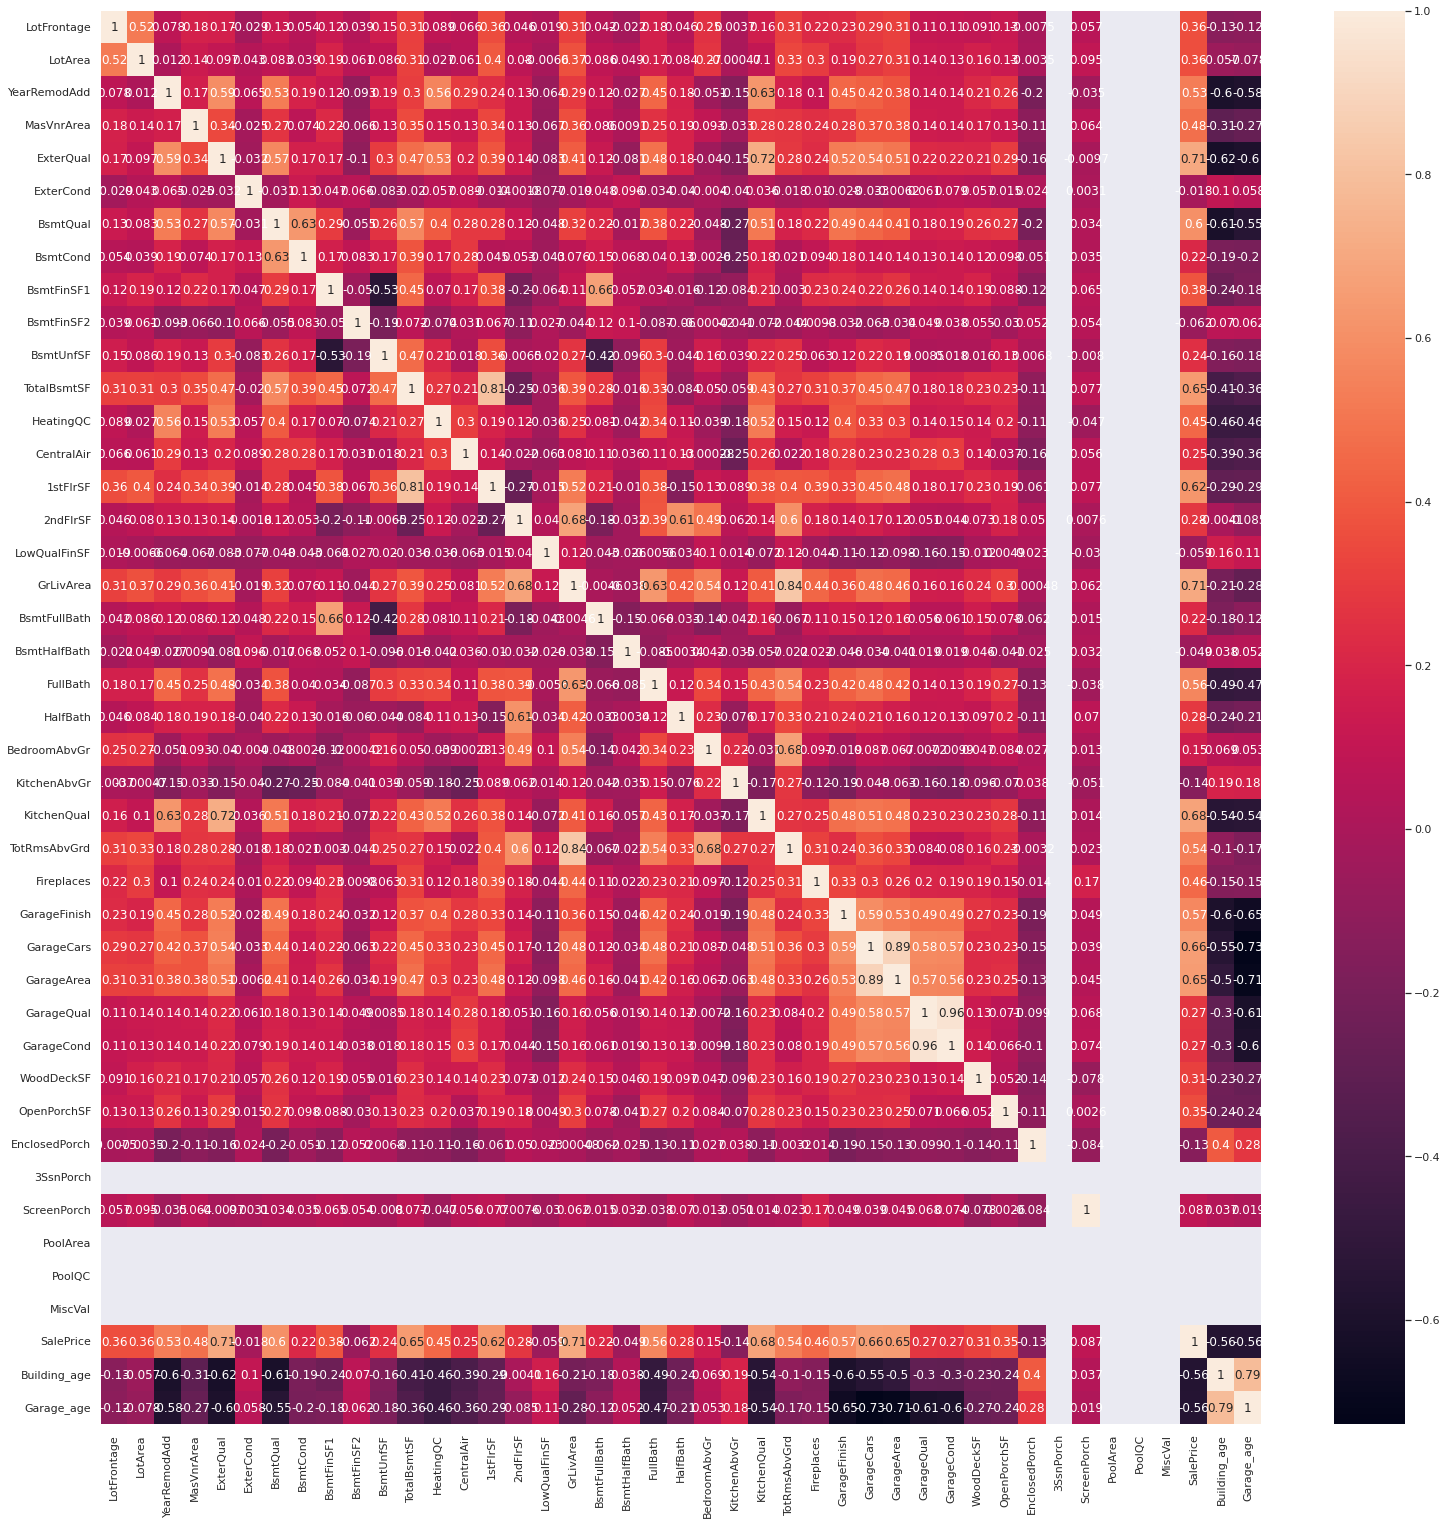

In [ ]:
#Heatmap to see corelation
plt.figure(figsize=(26,26))
sns.heatmap(housing[list(housing.dtypes[housing.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [ ]:
housing.dtypes[housing.dtypes=='object'].index

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical',
       'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### Dummy Variables creation

In [ ]:
#Creating dummy variables for catagorical variables

dummy_col = pd.get_dummies(housing[['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical',
       'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']],
                           drop_first=True)

In [ ]:
#concat the new dummy variables and housing DF
housing = pd.concat([housing,dummy_col],axis= 1)

In [ ]:
#dropping original catagorical variables for which we have created dummies
housing.drop(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical',
       'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition'], axis = 1, inplace = True)

In [ ]:
housing.shape

(1349, 361)

###### Checking the distribution of target variable-SalePrice

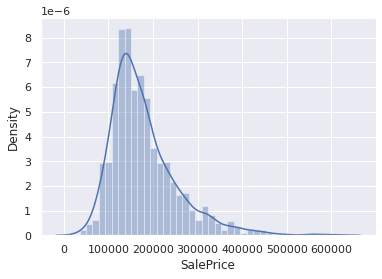

In [ ]:
sns.distplot(housing['SalePrice'])

Observation:The distribution of target variable is right skewed.

#Model Building

###### Train test split

In [ ]:
# Splitting the data into train and test
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Scaling

In [ ]:
#applying scaler
num_col = ['Building_age','Garage_age','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
           'CentralAir','KitchenQual','GarageFinish','GarageQual','GarageCond','PoolQC','GarageCars','GarageArea','WoodDeckSF',
           'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
           'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','LotFrontage','LotArea','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [ ]:
#creating y_train and x_train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [ ]:
X_train.shape

(944, 360)

In [ ]:
#creating y_test and x_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [ ]:
X_test.shape

(405, 360)

## Linear Regression

In [ ]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9391511922057638
-1225865283780101.8
57.44127455775899
4.6968138815669645e+17
0.060848807794236216
1159707131251102.2


## Ridge Regression

###### Parameter tuning

In [ ]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021548,0.000618,0.007010,0.000096,0.0001,{'alpha': 0.0001},-0.214011,-0.244887,-0.204184,-0.227305,...,-0.222955,0.013670,24,-0.167643,-0.153277,-0.170185,-0.161234,-0.162859,-0.163039,0.005846
1,0.021716,0.001681,0.009478,0.003974,0.001,{'alpha': 0.001},-0.213995,-0.244854,-0.204164,-0.227233,...,-0.222922,0.013662,23,-0.167646,-0.153280,-0.170191,-0.161235,-0.162862,-0.163043,0.005846
2,0.023563,0.003662,0.007674,0.000822,0.01,{'alpha': 0.01},-0.213839,-0.244535,-0.203994,-0.226537,...,-0.222606,0.013579,22,-0.167684,-0.153313,-0.170243,-0.161248,-0.162898,-0.163077,0.005853
3,0.021127,0.000245,0.007315,0.000480,0.05,{'alpha': 0.05},-0.213201,-0.243338,-0.203674,-0.223961,...,-0.221484,0.013211,21,-0.167846,-0.153465,-0.170478,-0.161353,-0.163052,-0.163239,0.005878
4,0.023016,0.002139,0.007278,0.000271,0.1,{'alpha': 0.1},-0.212496,-0.242202,-0.203679,-0.221506,...,-0.220446,0.012825,19,-0.168023,-0.153694,-0.170730,-0.161467,-0.163227,-0.163428,0.005883
5,0.021137,0.001032,0.007019,0.000053,0.2,{'alpha': 0.2},-0.211404,-0.240713,-0.203937,-0.218527,...,-0.219089,0.012326,18,-0.168355,-0.154108,-0.171123,-0.161647,-0.163538,-0.163754,0.005882
6,0.025388,0.006475,0.007129,0.000477,0.3,{'alpha': 0.3},-0.210543,-0.239622,-0.204231,-0.216215,...,-0.218053,0.011988,17,-0.168644,-0.154467,-0.171471,-0.161804,-0.163807,-0.164038,0.005884
7,0.021050,0.001018,0.008719,0.003718,0.4,{'alpha': 0.4},-0.209875,-0.238739,-0.204604,-0.214298,...,-0.217259,0.011723,15,-0.168890,-0.154782,-0.171771,-0.162003,-0.164087,-0.164306,0.005879
8,0.020863,0.000072,0.007144,0.000197,0.5,{'alpha': 0.5},-0.209395,-0.238147,-0.205070,-0.212702,...,-0.216728,0.011552,12,-0.169117,-0.155074,-0.172039,-0.162263,-0.164374,-0.164574,0.005865
9,0.021564,0.000730,0.007322,0.000647,0.6,{'alpha': 0.6},-0.209018,-0.237598,-0.205473,-0.211656,...,-0.216326,0.011384,10,-0.169368,-0.155389,-0.172273,-0.162583,-0.164667,-0.164856,0.005834


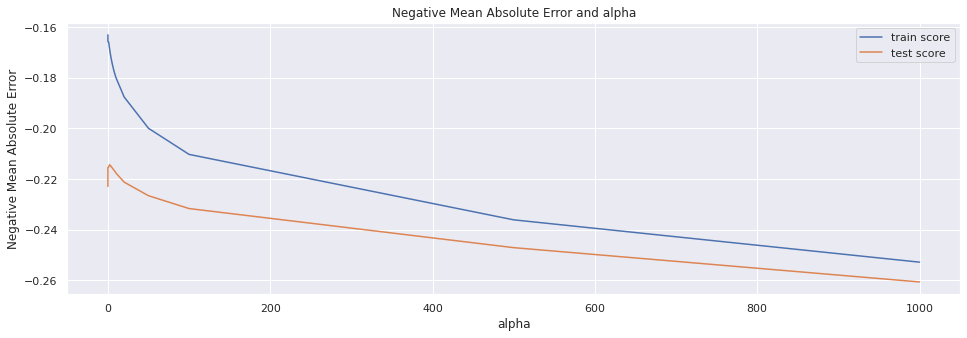

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [ ]:
#Fitting Ridge model for alpha =1.0  and printing coefficients which have been penalised
alpha =1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.13867858e-02  2.85925025e-02  1.35128781e-02  4.68064103e-02
  2.65472958e-02 -2.46723820e-02  1.11821932e-02  6.63279077e-03
  9.16464941e-02 -1.02597043e-02 -1.55101051e-04  9.36816926e-02
  1.75438830e-02  9.76886540e-03  1.27936206e-01  1.28500628e-01
 -8.82707416e-03  2.08902923e-01  1.24161442e-02 -4.64746215e-03
  3.14897447e-02  3.58413124e-02 -5.45240430e-02 -6.15574196e-02
  1.05569278e-02  5.36777368e-02  4.40887352e-03 -4.97816629e-03
  4.59068876e-02  3.13211966e-02  5.36887227e-02 -1.82795819e-02
  1.66915896e-02  1.81796556e-02  2.12092152e-02  0.00000000e+00
  3.23438291e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.37689456e-01  1.74030677e-02 -2.50043652e-02  2.21887614e-02
  1.55887125e-02 -2.92348111e-02  4.32010089e-02 -1.44617237e-02
  2.86481528e-02  4.02085016e-02  6.47861897e-02 -1.65086895e-02
 -3.26364456e-02 -6.28199835e-02 -3.37221317e-02  1.26297046e-02
  1.81993689e-01  1.66948324e-01  1.66794493e-01  1.26307008e-01
  2.21678084e-03  2.38021

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and MSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9381769144889641
0.9088643035100183
58.360992722417826
34.917980796428466
0.06182308551103583
0.08621723653439127


## Lasso Regression

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.190427,0.103406,0.007245,0.000103,0.0001,{'alpha': 0.0001},-0.208062,-0.234758,-0.205947,-0.215343,...,-0.216305,0.010178,2,-0.168976,-0.156005,-0.172614,-0.162704,-0.164311,-0.164922,0.005664
1,0.127194,0.002621,0.007329,0.000185,0.001,{'alpha': 0.001},-0.198543,-0.222924,-0.209704,-0.209652,...,-0.210054,0.007731,1,-0.182400,-0.171585,-0.182234,-0.176744,-0.178942,-0.178381,0.004004
2,0.027087,0.001831,0.007032,0.000043,0.01,{'alpha': 0.01},-0.223691,-0.262109,-0.246000,-0.236285,...,-0.239623,0.013441,3,-0.230362,-0.224920,-0.221855,-0.222504,-0.224538,-0.224836,0.002999
3,0.019421,0.001937,0.006967,0.000275,0.05,{'alpha': 0.05},-0.247421,-0.297343,-0.283959,-0.285883,...,-0.275276,0.018072,4,-0.274077,-0.263281,-0.268278,-0.266943,-0.270372,-0.268590,0.003586
4,0.018946,0.002333,0.006728,0.000096,0.1,{'alpha': 0.1},-0.262619,-0.312676,-0.298219,-0.304733,...,-0.291922,0.017915,5,-0.288393,-0.283174,-0.284659,-0.282826,-0.286537,-0.285118,0.002097
5,0.018004,0.000941,0.006918,0.000136,0.2,{'alpha': 0.2},-0.309332,-0.358115,-0.341561,-0.356654,...,-0.340211,0.017717,6,-0.334108,-0.337463,-0.330546,-0.329240,-0.333972,-0.333066,0.002906
6,0.016959,0.000511,0.006885,0.000160,0.3,{'alpha': 0.3},-0.371641,-0.423856,-0.402230,-0.431538,...,-0.406433,0.020854,7,-0.398019,-0.410212,-0.392872,-0.396438,-0.400201,-0.399548,0.005843
7,0.016874,0.000937,0.007284,0.000470,0.4,{'alpha': 0.4},-0.448225,-0.505758,-0.468918,-0.523116,...,-0.484364,0.026748,8,-0.470792,-0.491591,-0.469290,-0.478037,-0.475787,-0.477099,0.007917
8,0.016383,0.000855,0.006869,0.000288,0.5,{'alpha': 0.5},-0.534477,-0.594705,-0.545794,-0.611175,...,-0.568196,0.029555,9,-0.553095,-0.579335,-0.554822,-0.560676,-0.560165,-0.561618,0.009335
9,0.016448,0.002943,0.007920,0.002433,0.6,{'alpha': 0.6},-0.607910,-0.682934,-0.623173,-0.703574,...,-0.650554,0.036508,10,-0.630036,-0.667883,-0.641424,-0.645148,-0.642702,-0.645439,0.012367


In [ ]:
#Fitting lasso model for alpha =0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and MSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9303104838425031
0.9125556528769738
65.78690325267705
33.50366707225094
0.06968951615749687
0.0827251038821011


In [ ]:
lasso.coef_

array([ 2.08531111e-02,  2.37512204e-02,  2.01286517e-02,  5.25403537e-02,
        3.85935829e-02, -1.87818902e-02, -0.00000000e+00,  0.00000000e+00,
        8.94437158e-02, -9.58930462e-03,  0.00000000e+00,  7.78616623e-02,
        1.92053536e-02,  7.76674735e-03,  4.24125835e-02,  0.00000000e+00,
       -3.28066771e-02,  3.27089622e-01,  1.04231600e-02, -1.80613505e-03,
        2.70702914e-02,  2.99415496e-02, -5.70636651e-02, -7.64975659e-02,
        1.82135209e-02,  5.15046207e-02,  1.78682801e-02, -1.14827653e-04,
        4.91349991e-02,  3.03787290e-02,  6.24600040e-03, -0.00000000e+00,
        1.40468094e-02,  1.68939935e-02,  1.82704534e-02,  0.00000000e+00,
        2.87342172e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.27195538e-01,  1.75213900e-02, -1.29629325e-03,  0.00000000e+00,
        8.44603163e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  8.29255615e-03,  3.95020546e-02, -3.33449224e-03,
       -0.00000000e+00, -

In [ ]:
# Creating a table which contains all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.391512e-01,0.938177,0.930310
1,R2 Score (Test),-1.225865e+15,0.908864,0.912556
2,RSS (Train),5.744127e+01,58.360993,65.786903
3,RSS (Test),4.696814e+17,34.917981,33.503667
4,MSE (Train),2.466755e-01,0.248642,0.263988
5,MSE (Test),3.405447e+07,0.293628,0.287620


#### Lets observe the changes in the coefficients after regularization

In [ ]:
betas = pd.DataFrame(index=X_train.columns)

In [ ]:
betas.rows = X_train.columns

In [ ]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [ ]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,1.851082e-02,0.021387,0.020853
LotArea,3.555158e-02,0.028593,0.023751
YearRemodAdd,1.577697e-02,0.013513,0.020129
MasVnrArea,4.032991e-02,0.046806,0.052540
ExterQual,2.121260e-02,0.026547,0.038594
ExterCond,-2.493108e-02,-0.024672,-0.018782
BsmtQual,3.713794e-03,0.011182,-0.000000
BsmtCond,3.379541e-03,0.006633,0.000000
BsmtFinSF1,-7.168057e+10,0.091646,0.089444
BsmtFinSF2,-2.264018e+10,-0.010260,-0.009589


In [ ]:
#seeing all data
betas

,Linear,Ridge,Lasso
LotFrontage,1.851082e-02,0.021387,0.020853
LotArea,3.555158e-02,0.028593,0.023751
YearRemodAdd,1.577697e-02,0.013513,0.020129
MasVnrArea,4.032991e-02,0.046806,0.052540
ExterQual,2.121260e-02,0.026547,0.038594
ExterCond,-2.493108e-02,-0.024672,-0.018782
BsmtQual,3.713794e-03,0.011182,-0.000000
BsmtCond,3.379541e-03,0.006633,0.000000
BsmtFinSF1,-7.168057e+10,0.091646,0.089444
BsmtFinSF2,-2.264018e+10,-0.010260,-0.009589


Observation from lasso and Ridge models:
    By checking the R2_score we came to know that Lasso has better performace on test and train both as compared to Ridge.
    So we should conside Lasso model.

#### Analysis for subjective question1:

###### Lasso -double the value of alpha

In [ ]:
#double the value of alpha for lasso
alpha =0.001*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and MSE for double the value of alpha

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9250009186081974
0.909506046248522
70.79913283386159
34.67210172288911
0.07499908139180253
0.08561012771083731


###### Ridge-double the value of alpha

In [ ]:
#ridge
alpha =1.0*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=2.0)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for alpha 2.0
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9371997630072129
0.9099547136946612
59.283423721191035
34.50019804659483
0.06280023699278711
0.08518567418912304


In [ ]:
# Creating a table which contains all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.391512e-01,0.937200,0.925001
1,R2 Score (Test),-1.225865e+15,0.909955,0.909506
2,RSS (Train),5.744127e+01,59.283424,70.799133
3,RSS (Test),4.696814e+17,34.500198,34.672102
4,MSE (Train),2.466755e-01,0.250600,0.273860
5,MSE (Test),3.405447e+07,0.291866,0.292592


###### finding most important variables after the change

In [ ]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [ ]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [ ]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,1.851082e-02,0.021569,0.024905
LotArea,3.555158e-02,0.026380,0.023366
YearRemodAdd,1.577697e-02,0.013387,0.024439
MasVnrArea,4.032991e-02,0.049553,0.048154
ExterQual,2.121260e-02,0.031448,0.056421
ExterCond,-2.493108e-02,-0.024325,-0.013678
BsmtQual,3.713794e-03,0.014429,0.000000
BsmtCond,3.379541e-03,0.008698,-0.000594
BsmtFinSF1,-7.168057e+10,0.091500,0.096338
BsmtFinSF2,-2.264018e+10,-0.012319,-0.003142


In [ ]:
#all data
betas

,Linear,Ridge,Lasso
LotFrontage,1.851082e-02,0.021569,0.024905
LotArea,3.555158e-02,0.026380,0.023366
YearRemodAdd,1.577697e-02,0.013387,0.024439
MasVnrArea,4.032991e-02,0.049553,0.048154
ExterQual,2.121260e-02,0.031448,0.056421
ExterCond,-2.493108e-02,-0.024325,-0.013678
BsmtQual,3.713794e-03,0.014429,0.000000
BsmtCond,3.379541e-03,0.008698,-0.000594
BsmtFinSF1,-7.168057e+10,0.091500,0.096338
BsmtFinSF2,-2.264018e+10,-0.012319,-0.003142


###### Question 3 Analysis

In [ ]:
#creating lasso model with optimal alpha value and excluding the top 5 predictor variables of lasso
alpha =0.001
X_train.drop(['OverallQual_Excellent','OverallQual_Very Excellent','SaleCondition_Partial','GrLivArea','OverallQual_Very Good'],axis = 1, inplace =True)
X_test.drop(['OverallQual_Excellent','OverallQual_Very Excellent','SaleCondition_Partial','GrLivArea','OverallQual_Very Good'],axis = 1, inplace =True)
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and MSE for optimal of alpha

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9153665506105397
0.8993949847108439
79.89397622365043
38.54608158151633
0.0846334493894602
0.0951755100778181


In [ ]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [ ]:
betas['Lasso'] = lasso.coef_

In [ ]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Lasso
LotFrontage,0.016610
LotArea,0.019593
YearRemodAdd,0.006891
MasVnrArea,0.064867
ExterQual,0.087809
ExterCond,-0.022940
BsmtQual,0.038321
BsmtCond,-0.000000
BsmtFinSF1,0.095892
BsmtFinSF2,-0.024357


In [ ]:
betas

,Lasso
LotFrontage,0.016610
LotArea,0.019593
YearRemodAdd,0.006891
MasVnrArea,0.064867
ExterQual,0.087809
ExterCond,-0.022940
BsmtQual,0.038321
BsmtCond,-0.000000
BsmtFinSF1,0.095892
BsmtFinSF2,-0.024357
